In [1]:
from netCDF4 import Dataset as netDataset
import os
import xarray as xr
from datetime import timedelta, date, datetime
from tqdm import tqdm
import time
import numpy as np
import data_processing_tool as dpt


file_ACCESS_dir="F:/climate/access-s1/pr/daily/"
file_BARRA_dir="C:/Users/JIA059/barra/"
file_BARRA_dir_an="F:/climate/BARRA/"
# file_BARRA_dir="/g/data/ma05"
ensemble=['e01','e02']

# ensemble=['e01','e02','e03','e04','e05','e06','e07','e08','e09','e10','e11']

lat_name = "lat"
lon_name = "lon"
var_name="pr"
leading_time=217
leading_time_we_use=31

domain=[111.85, 155.875, -44.35, -9.975] #awap


# '''
# demo_date=date(1990,1,9)
# idx=7
# 漂移严重

# '''

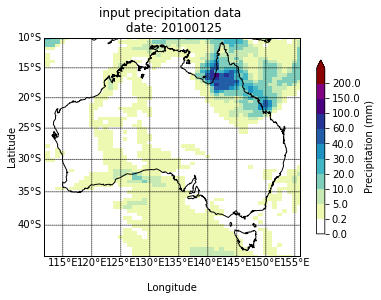

In [6]:
#demo input precipitation data
demo_date=date(2010,1,25)
idx=0
ensamble_demo="e01"
filename=file_ACCESS_dir+ensamble_demo+"/da_pr_"+demo_date.strftime("%Y%m%d")+"_"+ensamble_demo+".nc"

title="input precipitation data \n date: "+(demo_date+timedelta(idx)).strftime("%Y%m%d")
prec_in=dpt.read_access_data(filename,idx=idx)*86400

dpt.draw_aus(prec_in,title=title)


In [ ]:
#demo corresponding label data

label=dpt.read_barra_data_fc(file_BARRA_dir,(demo_date+timedelta(1)),nine2nine=True,date_minus_one=1)
title="label  \n date: "+(demo_date+timedelta(idx)).strftime("%Y%m%d")
dpt.draw_aus(label,title=title)


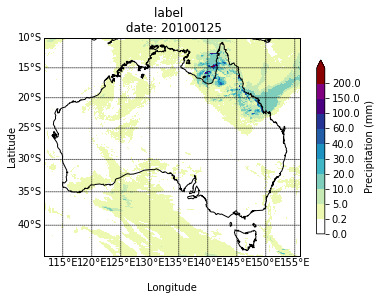

In [7]:

label=dpt.read_barra_data_an(file_BARRA_dir_an,(demo_date+timedelta(idx)),nine2nine=False)
title="label  \n date: "+(demo_date+timedelta(idx)).strftime("%Y%m%d")
dpt.draw_aus(label,title=title)


In [24]:
# label.data.shape
b=time.time()
for i in range(1000000):
    np.reshape(label.data,(768,1200,1,1))
#     np.expand_dims(label.data,axis=3)
print(b-time.time())

# np.reshape(label.data,(768,1200,1,1))

-1.5099318027496338
